# Training Neural Networks with MNIST Dataset

<img src="assets/function_approx.png" width=500px>

MNIST Dataset contains `images` of hand-written numbers and their `labels`. The goal of this project is to build a model that correctly identifies the number inputs.

First, download and load the training data.

In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Next, the model was trained for 10 epochs.

In [2]:
## Your solution here

model = nn.Sequential(nn.Linear(784, 128),  # hidden layer 1
                      nn.ReLU(),
                      nn.Linear(128, 64),   # hidden layer 2
                      nn.ReLU(),
                      nn.Linear(64, 10),    # output layer
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()    # loss function
optimizer = optim.SGD(model.parameters(), lr=0.003) # update function

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)   # flatten the image
    
        optimizer.zero_grad()   # set gradient descent to 0
        logits = model.forward(images)  # feedforward to obtain output
        loss = criterion(logits, labels)    # loss function to compare output with label
        loss.backward() # backpropagation
        optimizer.step()    # update equation
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8488915185811423
Training loss: 0.8265854087529152
Training loss: 0.528097948984805
Training loss: 0.432212642070327
Training loss: 0.3859366195351839
Training loss: 0.3577167770501647
Training loss: 0.3388384143347298
Training loss: 0.32423464181834954
Training loss: 0.3124492982033092
Training loss: 0.3023570844613667


With the network trained, predictions can be printed out.

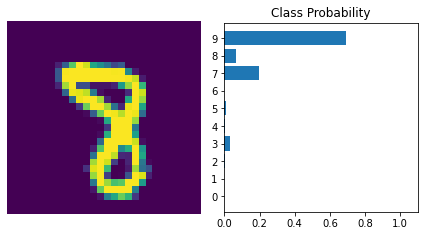

In [3]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

It can accurately predict the digits in the image inputs.